# Kickstarter Projects 

## Factors Associated with Successful Project 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob # To read all csv files in the directory
import seaborn as sns
import calendar

This project explored a dataset of about 378660 Kickstarter projects. Kickstarter is one of the popular crowdfunding platforms along with Indiegogo. The dataset was obtained from https://www.kaggle.com/kemical/kickstarter-projects. The explored datset contains data about projects from 2009 (when the platfrom was launched) up to 2018. It has a few projects from 1970 (which I will drop later). 

In [2]:
df_kaggel_2018 = pd.read_csv('data_2/ks-projects-201801.csv')
#df_kaggel_2018 = df_kaggel_2018.country.replace(to_replace='N,0"', value='NO')

In [3]:
print(f"From {len(df_kaggel_2018)} projects in the dataset, there are {len(df_kaggel_2018[df_kaggel_2018.duplicated(subset='ID')])} which are listed more than once.")

From 378661 projects in the dataset, there are 0 which are listed more than once.


In [4]:
df_kaggel_2018['launched'] = pd.to_datetime(df_kaggel_2018['launched'], errors='coerce')

In [5]:
df_kaggel_2018.launched.dtype

dtype('<M8[ns]')

In [6]:
print(f"The dataset contains projects added to Kickstarter between {min(df_kaggel_2018.launched).strftime('%d %B %Y')} and {max(df_kaggel_2018.launched).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 01 January 1970 and 02 January 2018.


In [7]:
len(df_kaggel_2018)

378661

In [8]:
df_kaggel_2018.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


In [9]:
df_kaggel_2018.name.dtype

dtype('O')

In [10]:
df_kaggel_2018['name'] = df_kaggel_2018['name'].astype(str)

In [11]:
#df_kaggel_2018['name'] = df_kaggel_2018['name'].str.split().str.len()

In [12]:
#df_kaggel_2018['name']

In [14]:

# Count length of each blurb
#df['blurb_length'] = df['blurb'].str.split().str.len()

# Drop blurb variable
#df.drop('blurb', axis=1, inplace=True)

In [15]:
df_kaggel_2018.set_index('ID', inplace=True)
df_kaggel_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Exploratory Data Analysis

Exploratory data analysis will help to find useful insights.

In [16]:
# Summary for the numerical data
df_kaggel_2018.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [50]:
print("Key stats:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df_kaggel_2018.usd_goal_real.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df_kaggel_2018.usd_pledged_real.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'].usd_pledged_real)))

print("The total amount of money pledged by backers to failed projects is ${0:,.0f}".format(sum(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed'].usd_pledged_real)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df_kaggel_2018)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'])/len(df_kaggel_2018))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df_kaggel_2018.usd_goal_real.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(df_kaggel_2018.usd_pledged_real.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'].usd_pledged_real.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed'].usd_pledged_real.mean()))
      
print("\nThe mean number of backers per project is", int(round(df_kaggel_2018.backers.mean(),0)))

Key stats:

The total amount of money that projects have aimed to raise is $17,211,809,113
The total amount of money pledged by backers is $3,430,261,249
The total amount of money pledged by backers to successful projects is $3,036,889,046
The total amount of money pledged by backers to failed projects is $261,108,466

The total number of successful or failed projects launched on Kickstarter is: 378,661
The total number of projects which were successfully funded is: 133,956
The proportion of completed projects which were successfully funded is: 35%

The mean project fundraising goal is $45,454
The mean amount pledged per project is $9,059
The mean amount pledged per successful project is $22,671
The mean amount pledged per failed project is $1,321

The mean number of backers per project is 106


#### How Projects growth changed between 2009-2018

The graph below shows the number of projects launched on Kickstarter from 2009 to end of 2017 (2018 is not included).
The first graph is showing growing numbers each year and the second graph is demonstrating growing numbers within the same period of time, but each month. 

- The number of projects steadily grows from 2009 up to the start of 2014.
- On Oct.31, 2012, Kickstarter opened projects based in the UK, followed by Canada in 2013, Australia and New Zealand and etc. 
- Projects started growing fast in 2014 and a little bit descreasing between 20015 and 2016. 

Text(0.5, 1.0, 'Number of Kickstarter projects launched between 2009-2018')

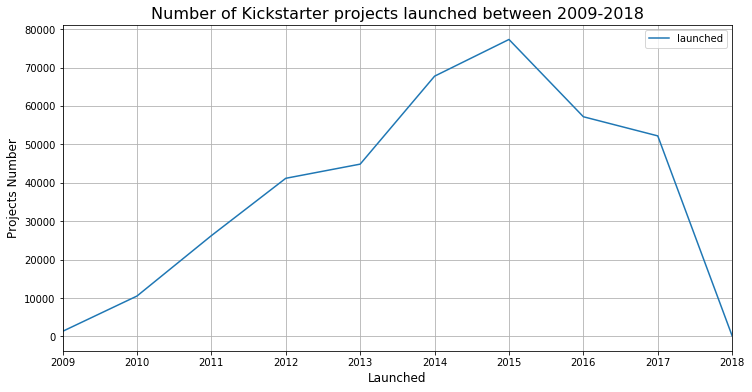

In [52]:
launched_per_year_2018 = pd.DatetimeIndex(df_kaggel_2018["launched"]).year
launched_per_year_2018 = launched_per_year_2018.value_counts()
launched_per_year_2018_2 = launched_per_year_2018.drop(launched_per_year_2018.index[-1])
launched_per_year_2018_2 = launched_per_year_2018_2.reset_index()
launched_per_year_2018_2 = launched_per_year_2018_2.sort_values(by=['index'])

ax = launched_per_year_2018_2.plot(x ='index', y =['launched'], figsize=(12, 6), grid=True)
ax.set_ylabel('Projects Number', fontsize=12)
ax.set_xlabel('Launched', fontsize=12)
ax.set_title('Number of Kickstarter projects launched between 2009-2018', fontsize=16)

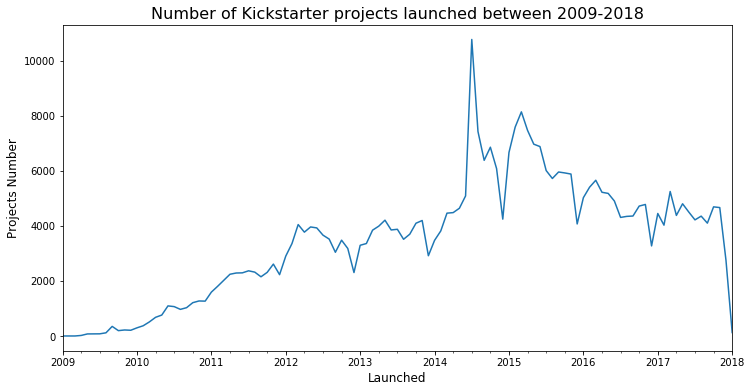

In [51]:
plt.figure(figsize=(12,6))
df_kaggel_2018.set_index('launched').category.resample('M').count().plot() 
plt.xlim('2009-01-01', '2018-01-02')
plt.xlabel('Launched', fontsize=12)
plt.ylabel('Projects Number', fontsize=12)
plt.title('Number of Kickstarter projects launched between 2009-2018', fontsize=16)
plt.show()


The bar charts below show failed vs successful projects betwen 2009 and 2018 (2018 is not included). We can see that starting from 2013 the number and of failed and successful projects start becoming even. 

In [27]:
success_projects_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'])
success_year_2018 = pd.DatetimeIndex(success_projects_2018['launched']).year
success_year_2018 = success_year_2018.value_counts()
success_year_2018 = success_year_2018.reset_index()
failed_projects_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed'])
failed_year_2018 = pd.DatetimeIndex(failed_projects_2018['launched']).year
failed_year_2018 = failed_year_2018.value_counts()
failed_year_2018 = failed_year_2018.reset_index()

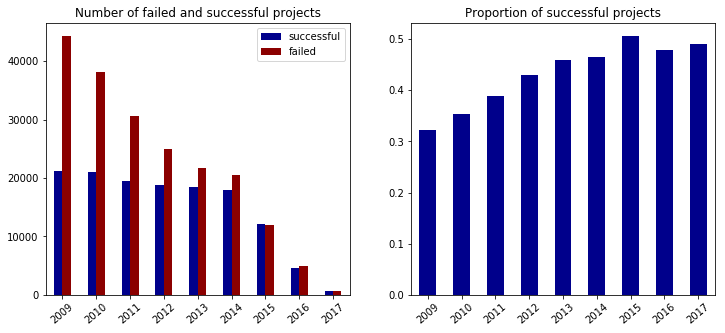

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

success_failed = pd.DataFrame({'successful': success_year_2018['launched'].values,
                   'failed': failed_year_2018['launched'].values})
#df2.plot.bar(ax = axes[0,0]); axes[0,1].set_title('B'), rot=0

success_failed.plot.bar(ax=ax[0], color=['darkblue', 'darkred'])
ax[0].set_title('Number of failed and successful projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(list(range(2009,2018)), rotation=40)

success_failed.div(success_failed.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax[1], color='darkblue') # Normalizes counts across rows
ax[1].set_title('Proportion of successful projects')
ax[1].set_xlabel('')
ax[1].set_xticklabels(list(range(2009,2018)), rotation=40)

plt.show()


What we can see from the recieved stats - the difference between successful and failed projects. 

The graphs below show how various features differ between failed and successful projects.

- It looks like successful projects are having smaller goals - the median amount asked by successful projects is half of what failed projects are asking for.
- The differences in the median amount pledged per project are more surprising. The median amount pledged per successful project is much higher than the median amount requested, suggesting that projects that meet their goal tend to go on to gain even more funding, and become 'over-funded'.
- On a related note, the difference between failed and successful companies is much larger in terms of amount pledged and the number of backers, compared to goal amount. Probably once potential backers see that a project looks like it will be successful, they are much more likely to jump on the bandwagon and fund it.
- Successful projects have slightly shorter durations.
- Successful projects tend to take slightly longer to launch, measured from the time the project was first created on the site.
- Average name lengths is very close between failed and successful projects.

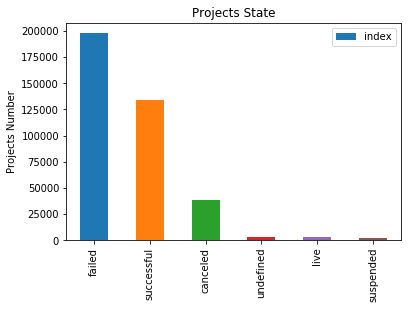

In [135]:
state_2018 = df_kaggel_2018["state"].value_counts()
ax = state_2018.plot(kind='bar', label='index', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])
ax.set_ylabel('Projects Number')
ax.set_title('Projects State')
ax.legend()
plt.show()

Projects have more than two states (failed or successful). I am planning to drop other raws and plot only failed and successful projects below and in the futures graphs. 

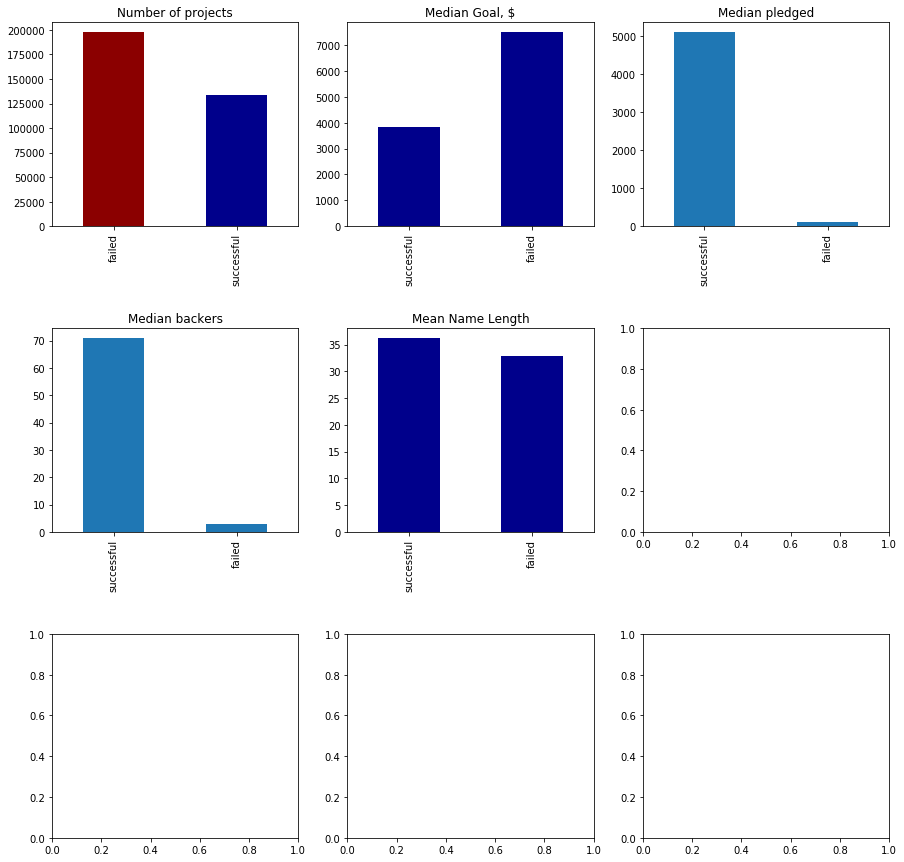

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axe = axes.ravel()

state_2018.reset_index()
projects_two_states = state_2018.drop(['canceled', 'undefined', 'live', 'suspended'])
projects_two_states.plot(ax=axe[0], color=['darkred', 'darkblue'], kind='bar', legend=False, label='index')
axe[0].set_title('Number of projects')

median_pedged_failed_2018 = failed_projects_2018.usd_pledged_real.median()
median_pledged_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).usd_pledged_real.median()
median_pledged_success_fail = (pd.DataFrame({"successful":[5107.25], "failed": [100.0]})).T
median_pledged_success_fail.plot(ax=axe[2], kind='bar', legend=False, label='index')
axe[2].set_title('Median pledged')

median_backers_failed_2018 = failed_projects_2018.backers.median()
median_backers_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).backers.median()
median_backers_success_fail = (pd.DataFrame({"successful":[71.0], "failed": [3.0]})).T
median_backers_success_fail.plot(ax=axe[3], kind='bar', legend=False, label='index')
axe[3].set_title('Median backers')


median_goal_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).usd_goal_real.median()
median_goal_failed_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed']).usd_goal_real.median()
median_success_fail = (pd.DataFrame({"successful":[3837.74], "failed": [7500.0]})).T
median_success_fail.plot(ax=axe[1], color=['darkblue', 'darkred'], kind='bar', legend=False, label='index')
axe[1].set_title('Median Goal, $')


failed_projects_name_length_mean_2018 = (failed_projects_2018['name'].astype('str')).apply(len).mean()
success_projects_name_length_mean_2018 = (success_projects_2018['name'].astype('str')).apply(len).mean()
mean_name_length_success_fail_2018 = (pd.DataFrame({"successful":[36.24413986682194], "failed": [32.84871964758066]})).T
mean_name_length_success_fail_2018.plot(ax=axe[4], color=['darkblue', 'darkred'], kind='bar', legend=False, label='index')
axe[4].set_title('Mean Name Length')

fig.subplots_adjust(hspace=0.5)
plt.show()

Categories of projects launched and which are more successful

- There are 15 project main categories (which are divided into more narrow categoris), where film&video is the most  popular, followed by music, publishing and games.
- Technology projects show the highest goals (looking at their median goal size), followed by design, food and games, and other other categories finding goals are smaller.
- But we can see that technology projects are really low when it comes to the median actually pledged amount.
- Games, comics, dance and design projects obtain the greatest amount of funding, on average (median).
- We can see that in terms of median pledged and median backers the most succesful categories are comics, dance, design, theatre and the least successful are journalism, grafts and technology (again, probably because of their large funding goals).
- Comics and games tend to attract the most backers, but each backer tends to pledge less.
- Dance and film & video tend to attract the most generous backers.

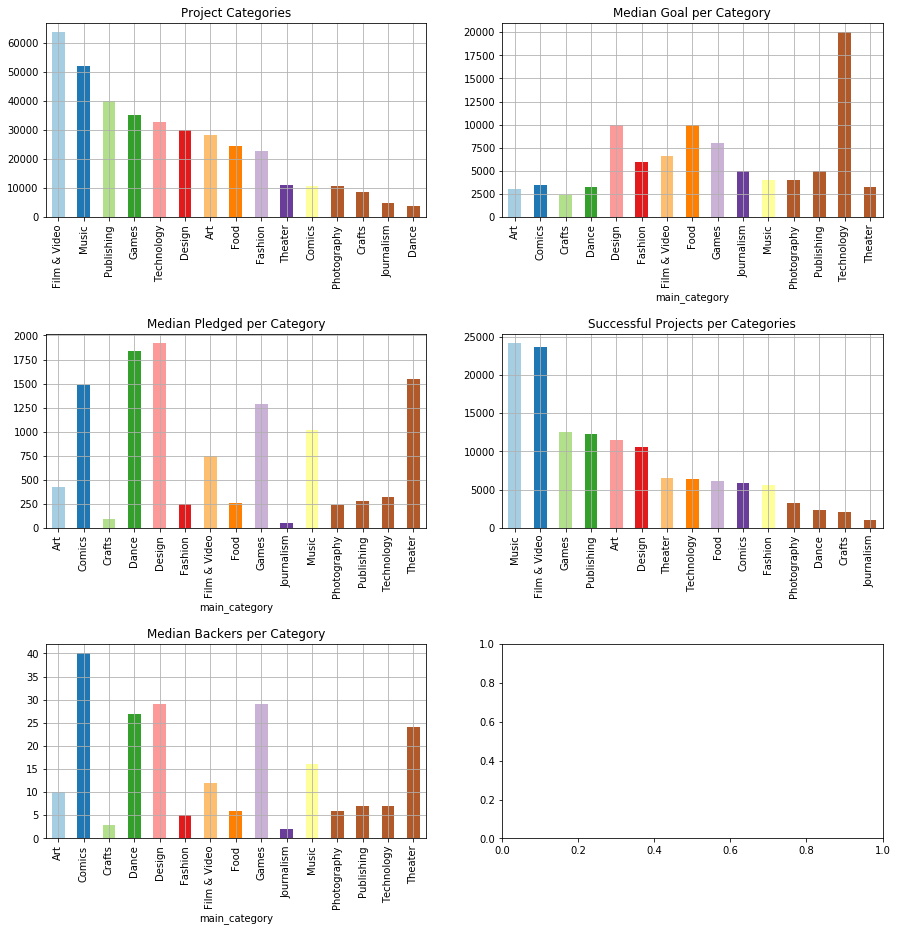

In [149]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = axes.ravel()

main_category_2018 = df_kaggel_2018["main_category"].value_counts()
main_category_2018.plot(ax=axe[0], kind = 'bar', title ="Project Categories", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('main_category').usd_goal_real.median().plot(ax=axe[1], kind='bar', title ="Median Goal per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('main_category').usd_pledged_real.median().plot(ax=axe[2], kind='bar', title ="Median Pledged per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

success_category = success_projects_2018['main_category'].value_counts()
success_category.plot(ax=axe[3], kind = 'bar', title ="Successful Projects per Categories", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('main_category').backers.median().plot(ax=axe[4], kind='bar', title ="Median Backers per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

fig.subplots_adjust(hspace=0.6)
plt.show()

#### Where do project owners come from and are some countries more successful than others?

- The majority of projects are originated in the US. The number of US projects is six times more than projects from other countries. After US second most prolific country (the UK).


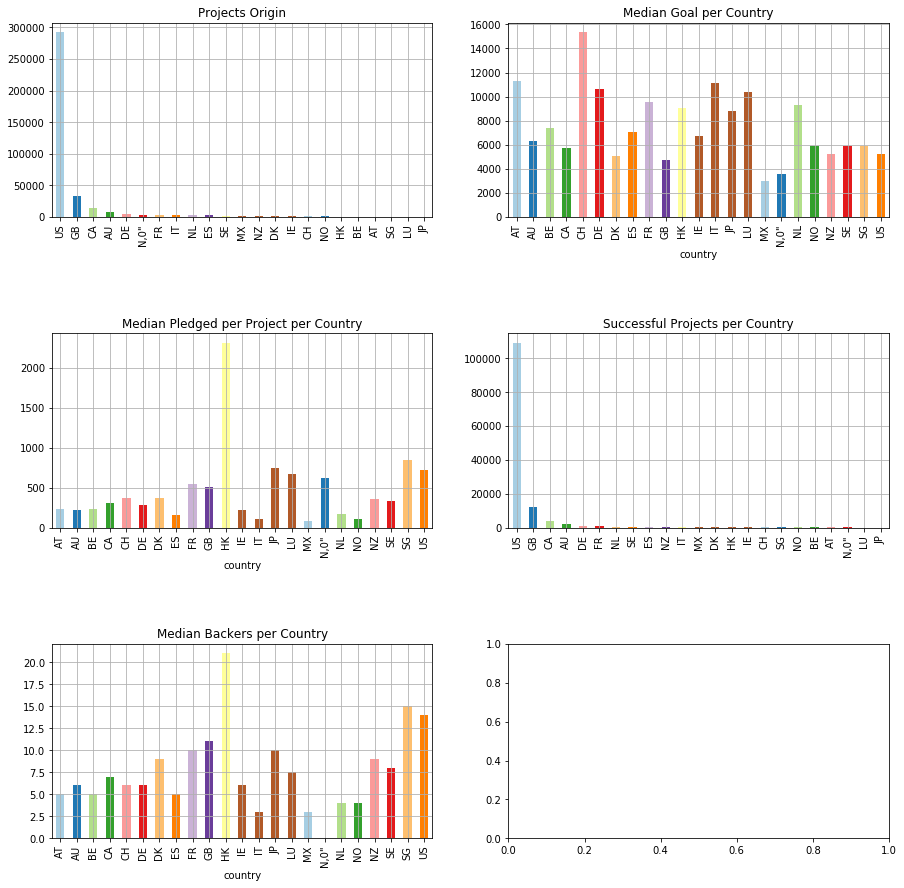

In [162]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = axes.ravel()

projects_distribution_2018 = df_kaggel_2018["country"].value_counts()
projects_distribution_2018.plot(ax=axe[0], kind='bar', label='index', title ='Projects Origin', grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('country').usd_goal_real.median().plot(ax=axe[1], kind='bar', title ="Median Goal per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('country').usd_pledged_real.median().plot(ax=axe[2], kind='bar', title ="Median Pledged per Project per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

success_country = success_projects_2018['country'].value_counts()
success_country.plot(ax=axe[3], kind = 'bar', title ="Successful Projects per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('country').backers.median().plot(ax=axe[4], kind='bar', title ="Median Backers per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))


fig.subplots_adjust(hspace=0.6)
plt.show()

In [168]:
day_df = pd.get_dummies(df_kaggel_2018.set_index('launched').state).groupby('launched').sum()
day_df.head()

,canceled,failed,live,successful,suspended,undefined
launched,,,,,,
1970-01-01 01:00:00,6,0,0,0,1,0
2009-04-21 21:02:48,0,1,0,0,0,0
2009-04-23 00:07:53,0,1,0,0,0,0
2009-04-24 21:52:03,0,0,0,1,0,0
2009-04-25 17:36:21,0,0,0,1,0,0


In [169]:
df_kaggel_2018.groupby('launched').launched.count().reindex(weekdays).plot(kind='bar', ax=ax1, color=color, rot=0)

NameError: name 'weekdays' is not defined

#### When is the best time to launch a project?

- Tuesday appears to be the best day to launch a project. It is the most popular launch day, and has the highest proportion of successful projects, the most backers, the highest median amount pledged per backer, and the highest median pledge amount overall.
- Weekends (and to a lesser extent Fridays) are the least popular days to launch a project, attract less money, have fewer backers, receive smaller pledges per backer, and are slightly less successful. They also tend to have lower goals, making it more surprising that they tend to be less successful and receive less funding.

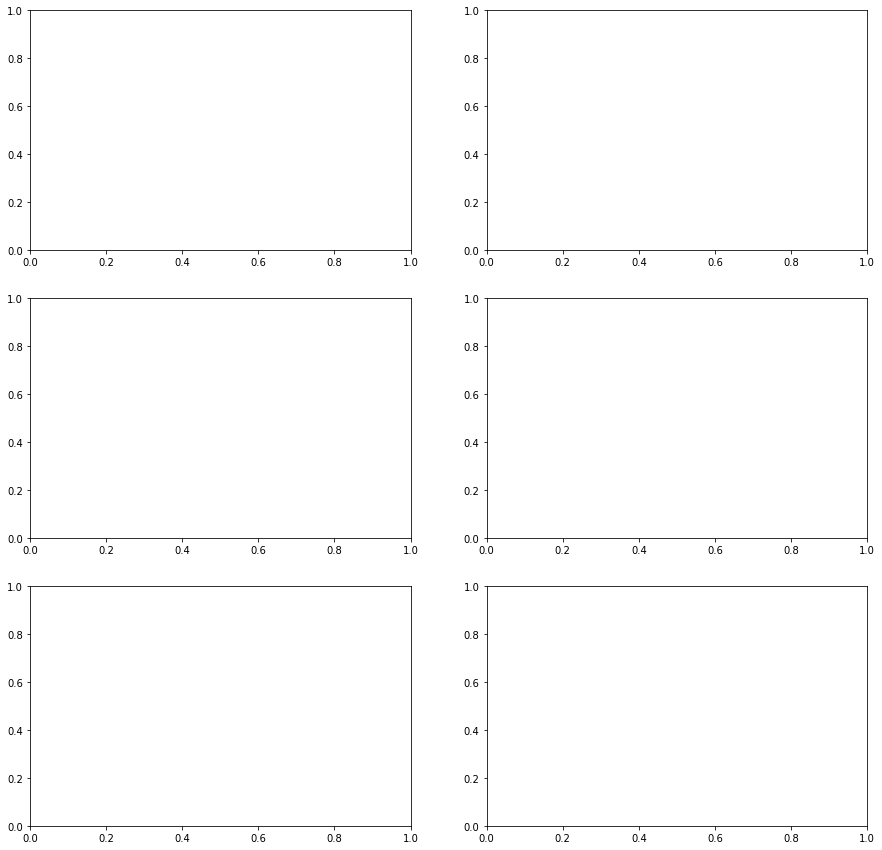

In [165]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = axes.ravel()

In [ ]:
failed_projects_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed'])
#failed_projects_2018.head()
#total_failed_projects_2018 = failed_projects_2018['state'].sum()
total_failed_projects_2018 = failed_projects_2018['state'].value_counts()
total_failed_projects_2018 = total_failed_projects_2018.reset_index()
total_failed_projects_2018 = total_failed_projects_2018['state'].sum()
total_failed_projects_2018

total_successful_projects_2018 = success_year_2018['launched'].sum() 
fail_success = pd.DataFrame({"successful":[133956], "failed": [197719]})
fail_success_transposed = fail_success.T
fail_success_transposed
goal_reached = success_projects_2018['usd_pledged_real']

In [ ]:
df_kaggel_2018.head(2)

In [ ]:
df_kaggel_2018['launched_at'] = pd.to_datetime(df_kaggel_2018['launched']).dt.to_period('Y', 'M', 'D')
df_kaggel_2018.head(1)

In [ ]:
'D', 'M', 'Y' are inputs
df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')
df.head()

In [ ]:
#df_kaggel_2018['campaign_days'] = df_kaggel_2018['deadline'] - df_kaggel_2018['launched']

#df_kaggel_2018['deadline'].astype(str).astype(int)
df_kaggel_2018.launched.dtype

In [173]:

df_kaggel_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378661 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 43.3+ MB


In [ ]:
# Time between creating and launching a project
df_kaggel_2018['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
# Or could show as number of hours:
# df['creation_to_launch_hours'] = df['launched_at'] - df['created_at']
# df['creation_to_launch_hours'] = df['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h') 

# Campaign length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

# Launch day of week
df['launch_day'] = df['launched_at'].dt.weekday_name

# Deadline day of week
df['deadline_day'] = df['deadline'].dt.weekday_name

# Launch month
df['launch_month'] = df['launched_at'].dt.month_name()

# Deadline month
df['deadline_month'] = df['deadline'].dt.month_name()